In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
def loadString(st):
    d = list(map(lambda x:int(x), st))
    return np.array(d).reshape(9,9)

def importData(fi):
    with open(fi, 'r') as f: 
        d = f.readline().strip().split(',')
    return loadString(d)

def importBlob(fi):
    with open(fi, 'r') as f: 
        d = [i for i in f.readline().strip()]
    return loadString(d)

In [395]:
col_map_std = np.array([ [2,2,2,0,0,0,2,2,2], [2,2,2,0,0,0,2,2,2], [2,2,2,0,0,0,2,2,2], [0,0,0,2,2,2,0,0,0], [0,0,0,2,2,2,0,0,0], [0,0,0,2,2,2,0,0,0], [2,2,2,0,0,0,2,2,2], [2,2,2,0,0,0,2,2,2], [2,2,2,0,0,0,2,2,2] ]) 

# col_map_std = col_map_std.astype('float64')

In [361]:

def matMap(mat, col_map=""):
    global col_map_std
    colors = col_map if len(col_map)!=0 else col_map_std
    sns.set(rc={'figure.figsize':(4,4)})
    palette = sns.color_palette('Greys', 9).as_hex()

    ax = sns.heatmap(colors, cmap=['#fff', '#a5a5a5', '#bcbcd9'], cbar=False, fmt='g')
    ax.set(yticklabels=[], xticklabels=[])
    ax.tick_params(left=False, bottom=False)

    for i in [3,6]:
        ax.axvline(x = i, color="black", ymin = 0, ymax = 1, linewidth=2)
        ax.axhline(y = i, color="black", xmin = 0, xmax = 1, linewidth=2)

    for i in range(1,9):
        ax.axvline(x = i, color="black", ymin = 0, ymax = 1, linewidth=0.25)
        ax.axhline(y = i, color="black", xmin = 0, xmax = 1, linewidth=0.25)

    for y in range(mat.shape[0]):
        for x in range(mat.shape[1]):
            if mat[y, x]: 
                plt.text(x + 0.5, y + 0.5, int(mat[y, x]),
                        horizontalalignment='center',
                        verticalalignment='center')
            else:
                plt.text(x + 0.5, y + 0.5, "",
                    horizontalalignment='center',
                    verticalalignment='center')
    plt.show()

In [417]:
np.vectorize({1:2,2:1}.get)

<function dict.get(key, default=None, /)>

In [430]:
col_map_std

array([[2, 2, 2, 0, 0, 0, 2, 2, 2],
       [2, 2, 2, 0, 0, 0, 2, 2, 2],
       [2, 2, 2, 0, 0, 0, 2, 2, 2],
       [0, 0, 0, 2, 2, 2, 0, 0, 0],
       [0, 0, 0, 2, 2, 2, 0, 0, 0],
       [0, 0, 0, 2, 2, 2, 0, 0, 0],
       [2, 2, 2, 0, 0, 0, 2, 2, 2],
       [2, 2, 2, 0, 0, 0, 2, 2, 2],
       [2, 2, 2, 0, 0, 0, 2, 2, 2]])

In [429]:
a = np.array([[1,2,3],
              [3,2,4]])

my_dict = {1:23, 2:34, 3:36, 4:45}
np.vectorize(my_dict.get)(col_map_std)


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

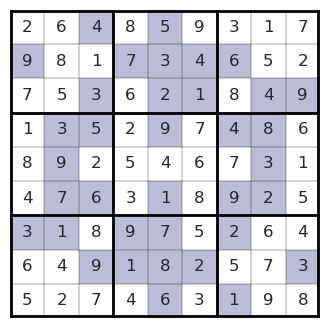

In [524]:
def matMatMap(mat, orimap=[]):
    global col_map_std
    colors = col_map_std
    sns.set(rc={'figure.figsize':(4,4)})
    palette = sns.color_palette('Greys', 9).as_hex()

    if len(orimap)!=0:
        filler = orimap.copy()
        # matMap(filler)
        filler[filler>0]=1
        # matMap(filler)
        colors = np.where(filler==0, colors, filler)
        # matMap(colors)
        # lookup = {1:2,2:1}
        # colors = np.vectorize(lookup.get)(colors)
        colors[colors>1]=0

    ax = sns.heatmap(colors, cmap=['#fff', '#a5a5a5', '#bcbcd9'], cbar=False, fmt='g')
    ax.set(yticklabels=[], xticklabels=[])
    ax.tick_params(left=False, bottom=False)

    for i in [0.02,3,6,8.95]:
        ax.axvline(x = i, color="black", ymin = 0, ymax = 1, linewidth=2)
        ax.axhline(y = i, color="black", xmin = 0, xmax = 1, linewidth=2)

    for i in range(1,9):
        ax.axvline(x = i, color="black", ymin = 0, ymax = 1, linewidth=0.25)
        ax.axhline(y = i, color="black", xmin = 0, xmax = 1, linewidth=0.25)

    for y in range(mat.shape[0]):
        for x in range(mat.shape[1]):
            if mat[y, x]: 
                plt.text(x + 0.5, y + 0.5, int(mat[y, x]),
                        horizontalalignment='center',
                        verticalalignment='center')
            else:
                plt.text(x + 0.5, y + 0.5, "",
                    horizontalalignment='center',
                    verticalalignment='center')
    plt.show()

matMatMap(e2, e1)

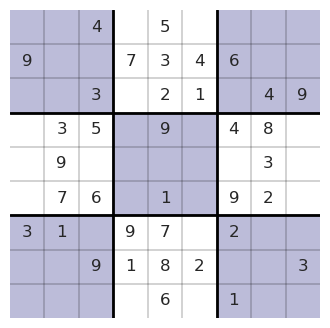

In [411]:
matMap(e1)

In [666]:
def calcMax(mat, rev=True):
    unique, counts = np.unique(mat, return_counts=True)
    return dict(sorted(filter(lambda x : x[1]<9, zip(unique[1:], counts[1:])), key=lambda x: x[1], reverse=rev))   

    # counts=list(zip(curset.keys(), curset.values()))
    # return dict(filter(lambda x : x[1]<9, zip(curset.keys(), curset.values())))   

def findHidden(mat, srch):
    x = np.array(list(map(lambda x: not int(x.__contains__(srch)), mat)))
    y = np.array(list(map(lambda x: not int(x.__contains__(srch)), mat.T)))
    t = mat.copy()
    m = mat.copy()
    m[m>0]=-1
    t[t!=srch]=0
    if srch==1: t[t==1]=10
    t = (x[:, None] * y) + t + m
    t[t<0]=0
    return t

def evalQuads(mat):
    rmat = []
    for i in range(3):
        for j in range(3):
            rmat.append(mat[i*3:(i+1)*3,j*3:(j+1)*3])
    nums = [sum(i.flatten()) for i in rmat]
    if 1 in nums:
        srch = nums.index(1)
        smat =  rmat[srch]
        idx = [i[0] for i in np.where(smat==1)]
        return [srch, idx]
    else: 
        return False
    
def setVal(mat, error, value):
    sr, id   = error
    ymap = {0:0,1:1,2:2,3:0,4:1,5:2,6:0,7:1,8:2}
    xmap = {0:0,1:0,2:0,3:1,4:1,5:1,6:2,7:2,8:2}  
    tmp = mat.copy()
    tmp[(xmap[sr]*3)+id[0], (ymap[sr]*3)+id[1]] = value
    return tmp

def correct(mat, fix, extra=False):
    if not extra: errorMat = findHidden(mat, fix)
    else: errorMat = findHiddenExtra(mat, fix)
    error =  evalQuads(errorMat)
    if not error:
        return mat, False, 0
    else:
        tmp = mat.copy()
        tmp = setVal(tmp, error, fix)
        return tmp, True, error
    
def fillBox(mat, fill=1):
    r = mat.copy()
    r[r==0]=10
    r[r<10]=0
    r[r==10]=fill
    return r

def fillHouse(mat):
    rmat = []
    for i in range(3):
        for j in range(3):
            rmat.append(mat[i*3:(i+1)*3,j*3:(j+1)*3])
    for i in rmat:
        if len(i[i==0]) == 1: i[i==0] = 45 - sum(i.flatten())

    return np.concatenate((
        np.concatenate(tuple(rmat[:3]), axis=1),
        np.concatenate(tuple(rmat[3:6]), axis=1),
        np.concatenate(tuple(rmat[6:]), axis=1)
    ), axis=0)

In [685]:
def main(mat, col_map=[], iter=2):
    col = not len(col_map)==0
    curset = calcMax(mat)
    for iters in range(iter):
        curset = calcMax(mat)
        for i in list(curset):
            if curset[i]>=9: continue
            for j in range(10):
                mat, ct, p = correct(mat, i)
                if ct==False: break
                if col: col_map = setVal(col_map, p, 1)
        curset = calcMax(mat)
        # if len(curset)>1: 
        #     mat = fillHouse(mat)
        #     curset = calcMax(mat)
        #     for i in list(curset):
        #         if curset[i]>=9: continue
        #         for j in range(10):
        #             mat, ct, p = correct(mat, i)
        #             if ct==False: break
        #             if col: col_map = setVal(col_map, p, 1)
        # curset = calcMax(mat)
        # if len(curset)>1:
        #     for i in list(curset):
        #         if curset[i]>=9: continue
        #         for j in range(10):
        #             mat, ct, p = correct(mat, i, extra=True)
        #             if ct==False: break
        #             if col: col_map = setVal(col_map, p, 1)

        if len(curset)==1: 
            fill = fillBox(mat, list(curset)[0])
            mat = np.where(mat==0, fill, mat)
            break
    if col: 
        return mat, col_map
    else:
        return mat

In [615]:
def findHiddenExtra(mat, srch):
    x = np.array(list(map(lambda x: int(not x.__contains__(srch)), mat)))
    y = np.array(list(map(lambda x: int(not x.__contains__(srch)), mat.T)))
    m = mat.copy()
    t = (x[:, None] * y) #+ t + m
    m[m>0]=1
    n = np.where(m!=1, m, t)
    t = t-n
    return t

{}


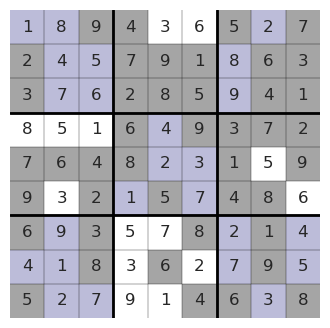

In [674]:
d = loadString('180036020205000800076000900850040000000020050030107006090570204410300005007910030')
sol = '189436527245791863376285941851649372764823159932157486693578214418362795527914638'
custom_map = col_map_std.copy()
d, custom_map = main(d,col_map=col_map_std.copy())

print(calcMax(d))
matMap(d, custom_map)

In [42]:
out = ','.join([f'{i}' for i in plot[0].flatten().tolist()])
with open('set_2_step1.csv', 'w') as f: f.write(out)

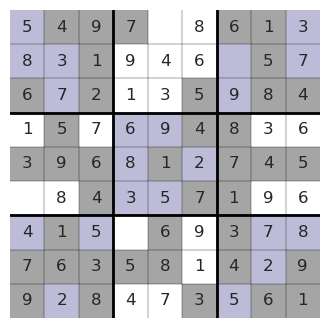

In [77]:
s1 = importData('set_2_step1.csv')
matMap(s1, plot[1])

In [94]:
def slicer(mat):
    rmat = []
    for i in range(3):
        for j in range(3):
            rmat.append(mat[i*3:(i+1)*3,j*3:(j+1)*3])
    return rmat

def fillHouse(mat):
    rmat = slicer(mat)
    # nums = list(map(lambda x:len(np.trim_zeros(x).tolist()), rmat))
    nums = [len(i.flatten()) for i in rmat]
    subFull = list(zip(range(len(nums)), nums))
    subFull = dict(filter(lambda x : x[1]==9, subFull))
    print(subFull)

fillHouse(s1)

{0: 9, 1: 9, 2: 9, 3: 9, 4: 9, 5: 9, 6: 9, 7: 9, 8: 9}


In [502]:
rmat = slicer(s1)
a = rmat[0]
v = np.trim_zeros(a[0]).tolist()


In [359]:
e1 = importBlob('./data/easy_1.blob')

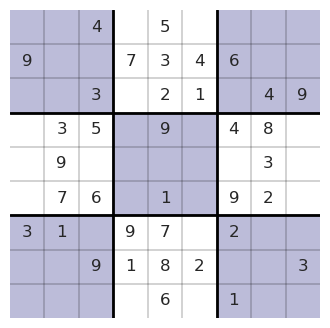

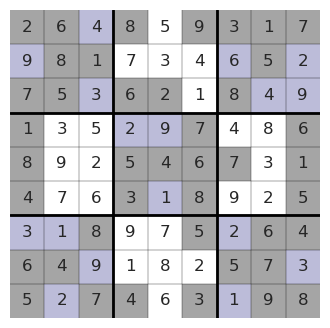

In [372]:
e1 = importBlob('./data/easy_1.blob')
custom_map = col_map_std.copy()
matMap(e1)

# %timeit main(e1, col_map=col_map_std.copy(), iter=40)
e2, custom_map = main(e1, col_map=col_map_std.copy(), iter=40)
matMap(e2, custom_map)

In [356]:
def validate(mat):
    exp = np.full((9), 45)
    c = mat.sum(axis=1) == exp
    r = mat.sum(axis=0) == exp
    s = []
    for i in range(3):
        for j in range(3):
            s.append(mat[i*3:(i+1)*3,j*3:(j+1)*3].flatten().sum())
            
    s = list(set(s))
    s = len(s)==1 and s[0]==45
    return {"columns": list(set(c))[0],'rows': list(set(r))[0], 'individual_boxes': s}

def compVal(mat, res):
    return int(''.join([f'{i}' for i in mat.flatten().tolist()]) == res)

validate(e1)


{'columns': True, 'rows': True, 'individual_boxes': True}

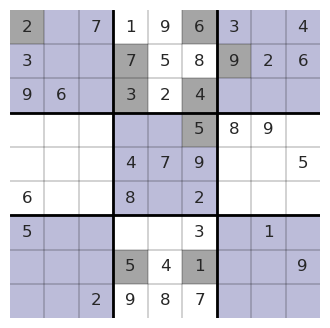

In [231]:
h1 = importBlob('./data/hard_set.blob')
custom_map = col_map_std.copy()

h1, custom_map = main(h1, col_map=col_map_std.copy(), iter=40)
matMap(h1, custom_map)

In [307]:
import pandas as pd
import seaborn as sns
from tqdm import tqdm 

In [275]:
def findZeroes(st):
    return 81 - st.count('0')

37

In [270]:
fdata = pd.read_csv('../sudoku.csv')

In [450]:
import timeit

In [678]:
rows = 1_000
data = pd.read_csv('./easy.csv', nrows=rows)
data.columns = ['puzzle', 'solution']

acc  =  0
stats = []
rows = len(data)
for i in tqdm(data.iloc()):
    t1 = loadString(i.puzzle)
    t1 = main(t1, iter=40)
    boo = compVal(t1, i.solution)
    if boo==1: acc+=1
    stats.append([findZeroes(i.puzzle), boo])
print('accuracy: ', f"{(acc)}/{rows} : {(acc/rows)*100}%")

1000it [00:08, 123.57it/s]

accuracy:  997/1000 : 99.7%


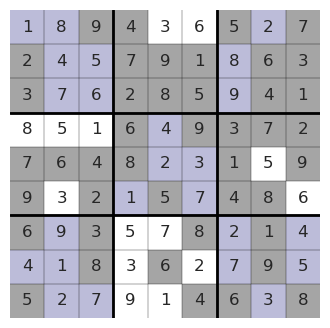

{'columns': True, 'rows': True, 'individual_boxes': True}

In [680]:
d = loadString('180036020205000800076000900850040000000020050030107006090570204410300005007910030')
sol = '189436527245791863376285941851649372764823159932157486693578214418362795527914638'
custom_map = col_map_std.copy()
d, custom_map = main(d,col_map=col_map_std.copy())
matMap(d, custom_map)
validate(d)

In [681]:
rows = 1_000
data = pd.read_csv('./easy.csv', nrows=rows)
data.columns = ['puzzle', 'solution']

acc  =  0
stats = []
rows = len(data)
for i in tqdm(data.iloc()):
    t1 = loadString(i.puzzle)
    t1 = main(t1, iter=40)
    boo = compVal(t1, i.solution)
    if boo==1: acc+=1
    stats.append([findZeroes(i.puzzle), boo])
print('accuracy: ', f"{(acc)}/{rows} : {(acc/rows)*100}%")

1000it [00:07, 130.88it/s]

accuracy:  997/1000 : 99.7%


In [445]:
75/100

0.75

In [683]:
rows = 1_00
data = pd.read_csv('../sudoku.csv', nrows=rows)
# data = fdata
acc  =  0
stats = []
rows = len(data)
for i in tqdm(data.iloc()):
    t1 = loadString(i.puzzle)
    custom_map = col_map_std.copy()
    t1, custom_map = main(t1, col_map=col_map_std.copy(), iter=40)
    boo = compVal(t1, i.solution)
    if boo==1: acc+=1

    stats.append([findZeroes(i.puzzle), boo])
print('accuracy: ', f"{(acc)}/{rows} : {acc/rows}%")

100it [00:03, 31.81it/s]

accuracy:  74/100 : 0.74%


<Axes: xlabel='num', ylabel='solve'>

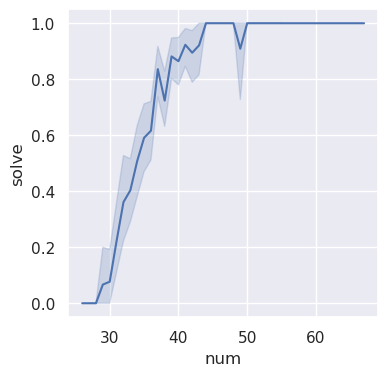

In [312]:
d = pd.DataFrame(stats, columns=['num', 'solve'])
# d = d.groupby('num').sum().reset_index()
# d.head()
sns.lineplot(d, x='num', y='solve')

In [ ]:
for i in 

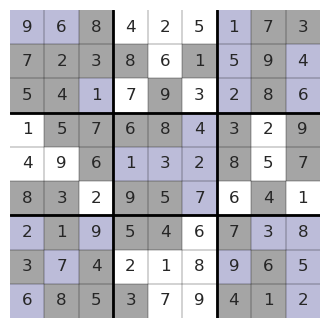

{'columns': True, 'rows': True, 'individual_boxes': True}

In [432]:
t1 = loadString('960405100020060504001703006100004000490130050002007601209006038070218905600079000')
custom_map = col_map_std.copy()

t1, custom_map = main(t1, col_map=col_map_std.copy(), iter=40)
matMap(t1, custom_map)
validate(t1)